# Appendix

During the work we did not always work on the same notebook, the way of working led to the need to run different functions in different places. The same functions or programs could sometimes take a long time, not only to write but also to understand, in light of which we assumed that deleting them would be a kind of waste of the precious time invested. Our decision was to consolidate all those notebooks into one notebook. This notebook will showcase the functions and programs taken from a variety of notebooks during the creation of this project. For each case we will present its source and use. And why it is not related to the final work. All of these notebooks are a significant part of the final product but will actually load and not really connect properly to the project and therefore we will look at them here.

***Please note: the below described procedures are not organized in a chronical order. Also, each part contains its own imports.***

---

#  1)  Summarizer

As part of the process of getting involved with project algorithms we noticed that the source of many of the problems was our data. It did not always fit certain models. This led him to pay attention to the pipeline from Transformers which can summarize large snippets of text and retain their meaning. We finally decided to leave the idea in question as it could significantly hurt the final product. But the results of the model are really amazing so let’s look at an example.

## 1.1. Installing Transformers and importing Dependencies

In [13]:
!pip install transformers

In [20]:
from transformers import pipeline

## 1.2. Load Summarization Pipeline

In [21]:
summarizer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


## 1.3. Summarize Text

In [24]:
def summarize_line(line):
    new_line = ''
    try:
        new_line = summarizer(line, max_length = 130, min_length = 30, do_sample = False)
        new_line = new_line[0]['summary_text'] 
    except:
        new_line = line[0:500]
    return new_line

In [22]:
text = '''An incandescent light bulb, incandescent lamp or incandescent light globe is an electric light with a wire filament heated until it glows. The filament is enclosed in a glass bulb with a vacuum or inert gas to protect the filament from oxidation. Current is supplied to the filament by terminals or wires embedded in the glass. A bulb socket provides mechanical support and electrical connections.

Incandescent bulbs are manufactured in a wide range of sizes, light output, and voltage ratings, from 1.5 volts to about 300 volts. They require no external regulating equipment, have low manufacturing costs, and work equally well on either alternating current or direct current. As a result, the incandescent bulb became widely used in household and commercial lighting, for portable lighting such as table lamps, car headlamps, and flashlights, and for decorative and advertising lighting.

Incandescent bulbs are much less efficient than other types of electric lighting, converting less than 5% of the energy they use into visible light.[1] The remaining energy is lost as heat. The luminous efficacy of a typical incandescent bulb for 120 V operation is 16 lumens per watt, compared with 60 lm/W for a compact fluorescent bulb or 150 lm/W for some white LED lamps.[2]

Some applications use the heat generated by the filament. Heat lamps are made for uses such as incubators, lava lamps, and the Easy-Bake Oven toy. Quartz tube halogen infrared heaters are used for industrial processes such as paint curing or for space heating.

Incandescent bulbs typically have short lifetimes compared with other types of lighting; around 1,000 hours for home light bulbs versus typically 10,000 hours for compact fluorescents and 20,000–30,000 hours for lighting LEDs. Incandescent bulbs can be replaced by fluorescent lamps, high-intensity discharge lamps, and light-emitting diode lamps (LED). Some areas have implemented phasing out the use of incandescent light bulbs to reduce energy consumption.'''

In [25]:
summarized_text = summarize_line(text)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [26]:
print(summarized_text)

An incandescent light bulb, incandescent lamp or incandescent light globe is an electric light with a wire filament heated until it glows. The filament is enclosed in a glass bulb with a vacuum or inert gas to protect the filament from oxidation. Current is supplied to the filament by terminals or wires embedded in the glass. A bulb socket provides mechanical support and electrical connections.

Incandescent bulbs are manufactured in a wide range of sizes, light output, and voltage ratings, from


---

# 2) Extracting CIK and Year for each file in a dictionary

As part of the process we had to do trial and error on the original data files. What helped us in the process was identifying the names of the companies to which each text file is attributed. Each file name is characterized by CIK and year and are separated by an underscore. We found it to be simple to create a program that would create for us a CSV file with the same CIK and YEAR from a folder of data files. Here are the results:

In [27]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords
import os
%matplotlib inline

In [28]:
csv_file_name  = 'cikAndYear.csv'
dir_name = 'Data'

In [29]:
df = pd.read_csv(csv_file_name)

In [ ]:
ciks = df.iloc[:, 1].tolist()[1:]
years = df.iloc[:, 2].tolist()[1:]
files_to_remove = []
for i in range(len(ciks)):
    name = ''
    name +=str(ciks[i]) + '_' + str(years[i])+'.txt'
    files_to_remove.append(name)

In [31]:
dir_files = os.listdir(dir_name)

In [32]:
def remove_files_from(file_names):
    needed_files = []
    for file_name in file_names:
        if file_name not in files_to_remove:
            needed_files.append(file_name)
    return needed_files    

In [38]:
def carcom_function(new_dir_name):
    os.mkdir(new_dir_name)
    needed_files = remove_files_from(os.listdir(dir_name))
    for name in needed_files:
        with open(dir_name + '\\' + name,'r', encoding = 'utf-8') as f:
            content = f.read()
        with open(new_dir_name + '\\' + name,'w', encoding = 'utf-8') as f2:
            f2.write(content) 

In [39]:
carcom_function('newData')

In [ ]:

import os
import pandas as pd
from pandas import DataFrame

def getCikAndYear():
    
    twoDlist = []
    twoDlist.append(['CIK','Year'])

    for filename in os.listdir("New_Control_Data2"):
        curCikAndYearList = [] 
        cikYearAndText = filename.split("_")
        cur_cik = cikYearAndText[0]
        curCikAndYearList.append(cur_cik)
        yearAndText = cikYearAndText[1].split(".")
        curYear = yearAndText[0]
        curCikAndYearList.append(curYear)
        twoDlist.append(curCikAndYearList)
    import pandas as pd
    new_list = twoDlist
    df = pd.DataFrame(new_list)
    df.to_csv('cikAndYear.csv')

---

# 3) File renamer, fixing bad Data and extracting all the good Data

Similar to the previous section. We wrote a program that will help you figure out which of our files did not run well and ended up having the same files we deleted and the following program helped us with that a lot:

In [1]:
# this program helps us remove the bad files from the data

In [2]:
import os

In [3]:
def removeRisk(filename):
    return filename[5:]

In [4]:
def renamer():
    os.mkdir('newData')
    for filename in os.listdir("RiskData"):
        text = ""
        newFileName = removeRisk(filename)
        with open('Data\\' + newFileName, 'r', encoding="utf-8") as f:
            text = f.read()
        with open("newData\\" + newFileName, "w", encoding="utf-8") as newFile:
            newFile.write(text)

In [5]:
def get_removed_files_name():
    removed_files = []
    n_d_names = os.listdir('newData')
    d_names = os.listdir('Data')
    for name in d_names:
        if name not in n_d_names:
            removed_files.append(name)
    return removed_files

In [6]:
def create_txt_file_for_list(a_list):
    content = ''
    for item in a_list:
        content += str(item[:-4]) + '\n' 
    with open('bad_files.txt', 'w', encoding = 'utf-8') as f:
        f.write(content)

In [7]:
renamer()
create_txt_file_for_list(get_removed_files_name())

---

# 4) Hashing Vec

We found another option to deal with a multi- dimentional vector, and that is to use a Hashig Vector. In this technique, the resulted vector contains a number of attributes, derived from the original information. In this technique, an arbitrary number of components is being defined, according to which the vector will be formed. Unfortunatelly, the big draw back of this technique is that the process is one- sided, meaning there is not option to re-identify the original attributes (in our case words). 

Similarly, in the previous discussed technique, of Truncated SVD, it is also barely possible to point out the main influencing factor. Therefore, For the sake of the integrity of the discussion, we explore the usage of the Hashing Vector.  

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

In [12]:
# using all text documents
text = all_combind_files_buffers

# create the transform, 20 features
vectorizer = HashingVectorizer(n_features=20)


Now we can encode the document:

In [13]:
# encode document
vector = vectorizer.transform(text)


We can investigate the size of the resulted vector:

In [14]:
# summarize encoded vector
print(vector.shape)


(709, 20)


As expected, the size is 689 rows, as the number of observations, on 20 columns, as the numbers of generated features

In [ ]:
#print(vector.toarray())

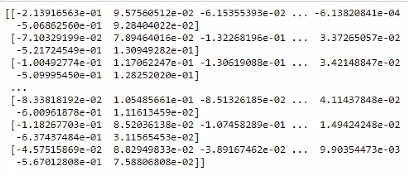

In [18]:
hash_vec_svd = vector
# define transform
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
# prepare transform on dataset
svd.fit(hash_vec_svd)
# apply transform to dataset
transformed_hash = svd.transform(hash_vec_svd)

In [ ]:
#transformed_hash

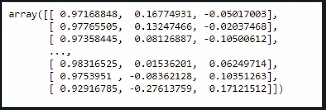

In [20]:
#convert to df
hash_svd= pd.DataFrame(data= transformed_hash, columns = ['PC 1', 'PC 2','PC 3'])

In [21]:
hash_svd

,PC 1,PC 2,PC 3
0,0.971688,0.167749,-0.050170
1,0.977655,0.132475,-0.020375
2,0.973584,0.081269,-0.105006
3,0.972819,0.029992,-0.033955
4,0.902145,-0.032153,-0.145832
...,...,...,...
704,0.954320,-0.111345,0.109355
705,0.950690,-0.066274,0.123494
706,0.983165,0.015362,0.062497
707,0.975395,-0.083621,0.103513


In [22]:
df_hash_svd = pd.concat([hash_svd, df[['tag']]], axis = 1)
df_hash_svd

,PC 1,PC 2,PC 3,tag
0,0.971688,0.167749,-0.050170,Y
1,0.977655,0.132475,-0.020375,Y
2,0.973584,0.081269,-0.105006,Y
3,0.972819,0.029992,-0.033955,Y
4,0.902145,-0.032153,-0.145832,Y
...,...,...,...,...
704,0.954320,-0.111345,0.109355,N
705,0.950690,-0.066274,0.123494,N
706,0.983165,0.015362,0.062497,N
707,0.975395,-0.083621,0.103513,N


In [23]:
print(svd.explained_variance_ratio_)

[0.02142815 0.32713819 0.08400689]


In [24]:
svd.explained_variance_ratio_.sum()

0.432573230531662

In [25]:
svd.singular_values_

array([25.52928741,  4.37582551,  2.21692588])

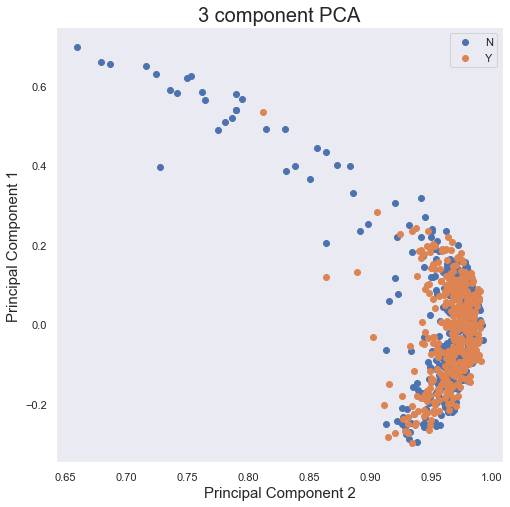

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['Red', 'Blue']
for target, color in zip(targets,colors):
    indicesToKeep = df_hash_svd['tag'] == target
    ax.scatter(df_hash_svd.loc[indicesToKeep, 'PC 1'],
    df_hash_svd.loc[indicesToKeep, 'PC 2'])
ax.legend(targets)
ax.grid()

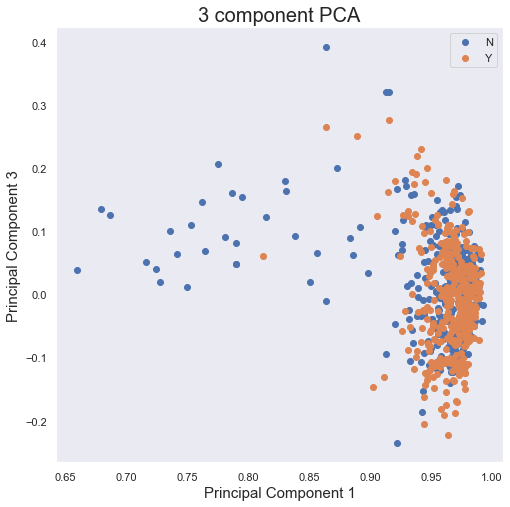

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['Red', 'Blue']
for target, color in zip(targets,colors):
    indicesToKeep = df_hash_svd['tag'] == target
    ax.scatter(df_hash_svd.loc[indicesToKeep, 'PC 1'],
    df_hash_svd.loc[indicesToKeep, 'PC 3'])
ax.legend(targets)
ax.grid()

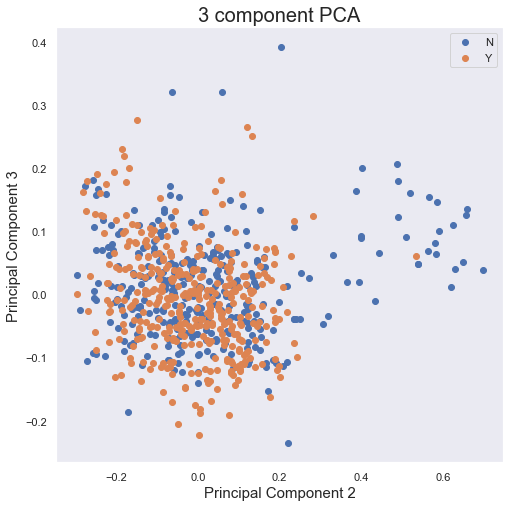

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['Red', 'Blue']
for target, color in zip(targets,colors):
    indicesToKeep = df_hash_svd['tag'] == target
    ax.scatter(df_hash_svd.loc[indicesToKeep, 'PC 2'],
    df_hash_svd.loc[indicesToKeep, 'PC 3'])
ax.legend(targets)
ax.grid()

---

# 5) CSV combining (notebook used to concat two csvs into 1)

Often, we had to combine (contact) a few data frames (mostly the ones of the treatment and control group). We used the below described procedure to do so.  

In [6]:
import os
import numpy as np
import csv

import pandas as pd 

In [7]:
dir_name = 'Csvs'
file_names = os.listdir(dir_name)
print(file_names)

['123456.csv', '1234567.csv']


In [ ]:
def add_cik_column(data, file_name):
    cik = file_name[:-4]
    new_data = []
    for row in data:
        cur_row = row
        cur_row.append(cik)
        new_data.append(cur_row)
    return  new_data
    

In [ ]:
title = []
data_from_all_files = []
title = []
for file_name in file_names:
    with open(dir_name + '\\' + file_name) as f:
        datareader = csv.reader(f, delimiter=',')
        cur_data = []
        for row in datareader:
            cur_data.append(row)
        if len(title) == 0:
            title = cur_data[0]
            title.append('cik')
        cur_data = cur_data[1:]
        cur_data = add_cik_column(cur_data, file_name)
        data_from_all_files.extend(cur_data)

In [ ]:
df = pd.DataFrame(data_from_all_files, columns = title)

In [19]:
df.to_csv('combined_with_cik.csv')

---

# 6) Scatter attempt for two lists

Here we will see a short program whose main purpose was to create scatter plots for two lists, although it seems that this section is not very significant but we learned a lot about the variety of graphs used in the project and therefore it is important for us to mention it as well. Here are the results:

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('wordnet')

import os
import io
import sys
import shutil
import string
from string import punctuation
import numpy as np 

import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
scatter_df1 = pd.read_csv('ControlpercentageDf.csv', sep = ',')
scatter_df1

,Unnamed: 0,financial,business,including,risk
0,filteredRisk1000180_2008.txt,0.00988,0.00733,0.00478,0.00255
1,filteredRisk1001250_2017.txt,0.00561,0.00481,0.00722,0.00241
2,filteredRisk1001258_2013.txt,0.00782,0.00965,0.00499,0.00449
3,filteredRisk1005181_2005.txt,0.01151,0.00863,0.00479,0.00096
4,filteredRisk1009829_2016.txt,0.01718,0.00835,0.00540,0.00638
...,...,...,...,...,...
299,filteredRisk945989_2013.txt,0.00298,0.01014,0.00328,0.00239
300,filteredRisk946581_2011.txt,0.00706,0.00941,0.00627,0.00470
301,filteredRisk946581_2013.txt,0.00791,0.01085,0.00633,0.00452
302,filteredRisk949859_2005.txt,0.01045,0.00358,0.00164,0.00254


In [3]:
scatter_df2 = pd.read_csv('TreatmentpercentageDf.csv', sep = ',')
scatter_df2

,Unnamed: 0,business,financial,including,risk,operation
0,filteredRisk1002047_2012.txt,0.01240,0.01180,0.00544,0.00469,0.00408
1,filteredRisk1002517_2017.txt,0.01107,0.00839,0.00570,0.00369,0.00537
2,filteredRisk1002910_2011.txt,0.00292,0.01231,0.00842,0.00777,0.00615
3,filteredRisk1005414_2014.txt,0.00974,0.00974,0.00527,0.00632,0.00711
4,filteredRisk1005414_2016.txt,0.01040,0.00969,0.00662,0.00615,0.00757
...,...,...,...,...,...,...
380,filteredRisk946581_2011.txt,0.00941,0.00706,0.00627,0.00470,0.00261
381,filteredRisk946581_2012.txt,0.01009,0.00763,0.00591,0.00443,0.00246
382,filteredRisk95521_2012.txt,0.01246,0.01076,0.00283,0.00453,0.00736
383,filteredRisk95521_2013.txt,0.00962,0.00995,0.00663,0.00398,0.00630


In [4]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [5]:
columnsIntersection = intersection(scatter_df1.columns, scatter_df2.columns)[1:]

In [6]:
print(columnsIntersection)

['financial', 'business', 'including', 'risk']


In [7]:
def getProbList(word, df):
    ProbList = df[word].tolist()
    TwoDList = []
    index = 1
    for prob in ProbList:
        TwoDList.append([index, prob])
        index +=1
    return TwoDList

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def scatter_two_lists(word, list1, list2):
    index1  = list(range(1,len(list1)+1))  
    index2  = list(range(1,len(list2)+1))  
    
    probList1 = list1[word].tolist()
    probList2 = list2[word].tolist()  
                          
    df1 = pd.DataFrame({"prob": probList1}, index = index1)
    
    df2 = pd.DataFrame({"prob": probList2}, index = index2)
                          
    ax = df1.plot(style='ro', legend=False)
    
          
    df2.plot(style='bo',ax=ax, legend=False)
                 
    plt.title(word)
    plt.xlabel("file number")
    plt.ylabel("word probability")
    
    plt.show()

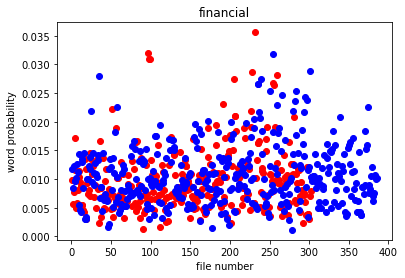

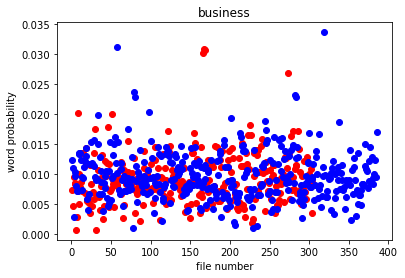

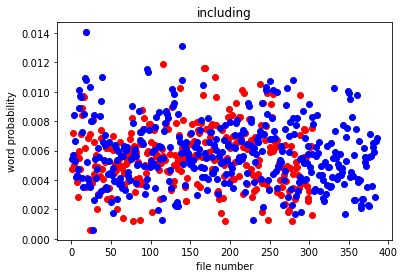

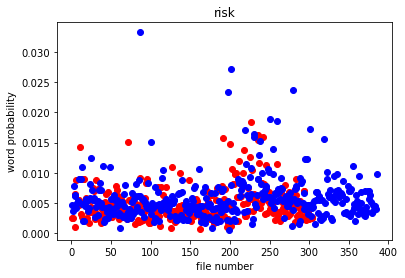

In [21]:
for word in columnsIntersection:
    scatter_two_lists(word, scatter_df1, scatter_df2)

---

# 7) Word probs concat df

At some point our models produced results for two different types of information i.e. for the control group and for the treatment group. We then realized that in order to reach real conclusions we had to use data obtained in a connected way. Because the results were very big and because we have a computer and a keyboard and it's a shame to just work hard. We have written a plan that will do this work for us and actually connect two CSV files to one according to our requirements. Here are the results:

In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords
import os
%matplotlib inline

In [56]:
c_df = pd.read_csv('test_t1_updated.csv')
c_df= c_df.drop(['Unnamed: 0'], axis=1)

In [23]:
t_df = pd.read_csv('percentageDf_train_treat.csv')
t_df= t_df.drop(['Unnamed: 0'], axis=1)

In [58]:
c_df

,result,business,including,operation,risk
0,0.01913,0.01107,0.00570,0.00537,0.00369
1,0.01573,0.00815,0.00421,0.00449,0.00421
2,0.00412,0.00194,0.00218,0.00312,0.00124
3,0.01520,0.00975,0.00172,0.00946,0.00344
4,0.01177,0.00715,0.00589,0.00463,0.00715
...,...,...,...,...,...
66,0.00920,0.00904,0.00261,0.00383,0.00199
67,0.00863,0.00817,0.00817,0.00513,0.00397
68,0.01109,0.00838,0.00270,0.00676,0.00379
69,0.00753,0.01505,0.00564,0.00376,0.00376


In [57]:
t_df

,financial,result,business,operation,risk,including
0,0.00641,0.00591,0.00574,0.00466,0.00291,0.00275
1,0.01180,0.01543,0.01240,0.00408,0.00469,0.00544
2,0.01173,0.01023,0.00722,0.00421,0.00211,0.00421
3,0.01231,0.02138,0.00292,0.00615,0.00777,0.00842
4,0.00666,0.00427,0.00281,0.00583,0.00177,0.00343
...,...,...,...,...,...,...
277,0.00763,0.01034,0.01009,0.00246,0.00443,0.00591
278,0.01195,0.00935,0.01087,0.00217,0.00456,0.00652
279,0.01231,0.01426,0.01361,0.00583,0.00454,0.00454
280,0.01076,0.01472,0.01246,0.00736,0.00453,0.00283


In [48]:
t_df.columns

Index(['financial', 'result', 'business', 'operation', 'risk', 'including'], dtype='object')

In [59]:
control_train_data = {}
file_names = os.listdir('test_treat-20')
for name in file_names:
    with open('test_treat-20\\' + name,'r', encoding='utf-8') as f:
        content = f.read()
    control_train_data[name] = content.split()

In [3]:
""""def get_files_word_count(word):
    counter = 0
    for key, value in control_train_data.items():
        if word in value:
            counter+=1
    return counter
"""

'"def get_files_word_count(word):\n    counter = 0\n    for key, value in control_train_data.items():\n        if word in value:\n            counter+=1\n    return counter\n'

In [8]:
#c = get_files_word_count('subject')
#c = c/len(file_names)
#c

In [60]:
def get_probs_row(words, words_list):
    probs_row = []
    for word in words:
        cur_prob = 0
        if word in words_list:
              cur_prob = words_list.count(word)/len(words_list)
        probs_row.append(cur_prob)
    return probs_row

In [61]:
def get_prob_list(words):
    prob_list = []
    for file_name in file_names:
        cur_words_list = control_train_data[file_name]
        cur_row = get_probs_row(words, cur_words_list)
        prob_list.append(cur_row)
    return prob_list

In [62]:
def columns_substruction(lst1, lst2):
    columns_substruction = []
    if len(lst1) > len(lst2):
        big_list = lst1
        small_list = lst2
    else:
        big_list = lst2
        small_list = lst1
        
    for item in big_list:
        if item not in small_list:
            columns_substruction.append(item)
    return columns_substruction

In [63]:
lst1 = c_df.columns[:].tolist()
lst2 = t_df.columns[:].tolist()
columns_substruction1 = columns_substruction(lst1, lst2)
columns_substruction1

['financial']

In [50]:
lst1

['result',
 'business',
 'ability',
 'service',
 'including',
 'operation',
 'risk',
 'cause',
 'material',
 'increase',
 'make',
 'item']

In [51]:
lst2

['financial', 'result', 'business', 'operation', 'risk', 'including']

In [74]:
two_d_list = get_prob_list(columns_substruction1)
substruction_df = pd.DataFrame(two_d_list, columns =columns_substruction1) 
substruction_df

,financial
0,0.002686
1,0.003012
2,0.003977
3,0.004144
4,0.005198
...,...
66,0.002687
67,0.001924
68,0.002694
69,0.004259


In [16]:
print(len(columns_substruction1))

1


In [39]:
t_df

,financial,result,business,operation,risk,including
0,0.00641,0.00591,0.00574,0.00466,0.00291,0.00275
1,0.01180,0.01543,0.01240,0.00408,0.00469,0.00544
2,0.01173,0.01023,0.00722,0.00421,0.00211,0.00421
3,0.01231,0.02138,0.00292,0.00615,0.00777,0.00842
4,0.00666,0.00427,0.00281,0.00583,0.00177,0.00343
...,...,...,...,...,...,...
277,0.00763,0.01034,0.01009,0.00246,0.00443,0.00591
278,0.01195,0.00935,0.01087,0.00217,0.00456,0.00652
279,0.01231,0.01426,0.01361,0.00583,0.00454,0.00454
280,0.01076,0.01472,0.01246,0.00736,0.00453,0.00283


In [54]:
c_df= c_df.drop(['ability', 'service', 'cause', 'material', 'increase', 'make', 'item'], axis=1)
c_df

,result,business,including,operation,risk
0,0.01913,0.01107,0.00570,0.00537,0.00369
1,0.01573,0.00815,0.00421,0.00449,0.00421
2,0.00412,0.00194,0.00218,0.00312,0.00124
3,0.01520,0.00975,0.00172,0.00946,0.00344
4,0.01177,0.00715,0.00589,0.00463,0.00715
...,...,...,...,...,...
66,0.00920,0.00904,0.00261,0.00383,0.00199
67,0.00863,0.00817,0.00817,0.00513,0.00397
68,0.01109,0.00838,0.00270,0.00676,0.00379
69,0.00753,0.01505,0.00564,0.00376,0.00376


In [75]:
train_c_updated = pd.concat([c_df, substruction_df], axis=1)

In [76]:
train_c_updated

,result,business,including,operation,risk,financial
0,0.01913,0.01107,0.00570,0.00537,0.00369,0.002686
1,0.01573,0.00815,0.00421,0.00449,0.00421,0.003012
2,0.00412,0.00194,0.00218,0.00312,0.00124,0.003977
3,0.01520,0.00975,0.00172,0.00946,0.00344,0.004144
4,0.01177,0.00715,0.00589,0.00463,0.00715,0.005198
...,...,...,...,...,...,...
66,0.00920,0.00904,0.00261,0.00383,0.00199,0.002687
67,0.00863,0.00817,0.00817,0.00513,0.00397,0.001924
68,0.01109,0.00838,0.00270,0.00676,0.00379,0.002694
69,0.00753,0.01505,0.00564,0.00376,0.00376,0.004259


In [77]:
c_df.to_csv('test_t_updated.csv')

---

# 8) Creating similar amount of train and test

As discussed in part 1 of the project- we wanted to create the treatment and control group with a similar amount of observation each. Therfore, we created the below procedure. Eventually, we manage to have a difference of 3 observations between the two groups- which were also balanced from the companies' fiscal view.

In [3]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords
import os
%matplotlib inline

In [1]:
csv_file_name  = 'cikAndYear treatment after cleanup.csv'
dir_name = 'New_Test_Data'

In [4]:
df = pd.read_csv(csv_file_name)

In [ ]:
ciks = df.iloc[:, 0].tolist()[1:]
years = df.iloc[:, 1].tolist()[1:]
files_to_keep = []
for i in range(len(ciks)):
    name = ''
    name +=str(ciks[i]) + '_' + str(years[i])+'.txt'
    files_to_keep.append(name)

In [17]:
dir_files = os.listdir(dir_name)

In [21]:
def remove_files_from(file_names):
    needed_files = []
    for file_name in file_names:
        if file_name in files_to_keep:
            needed_files.append(file_name)
    return needed_files    

In [22]:
def copy_from_dir(new_dir_name):
    os.mkdir(new_dir_name)
    needed_files = remove_files_from(os.listdir(dir_name))
    for name in needed_files:
        with open(dir_name + '\\' + name,'r', encoding = 'utf-8') as f:
            content = f.read()
        with open(new_dir_name + '\\' + name,'w', encoding = 'utf-8') as f2:
            f2.write(content) 

In [23]:
copy_from_dir('new_treat')

In [1]:

import os
import pandas as pd
from pandas import DataFrame

def getCikAndYear():
    
    twoDlist = []
    twoDlist.append(['CIK','Year'])

    for filename in os.listdir("New_Control"):
        curCikAndYearList = [] 
        cikYearAndText = filename.split("_")
        cur_cik = cikYearAndText[0]
        curCikAndYearList.append(cur_cik)
        yearAndText = cikYearAndText[1].split(".")
        curYear = yearAndText[0]
        curCikAndYearList.append(curYear)
        twoDlist.append(curCikAndYearList)
    import pandas as pd
    new_list = twoDlist
    df = pd.DataFrame(new_list)
    df.to_csv('cikAndYear.csv')

---

# 9) Doc-To-Vec

During the project we also tried to use DOC TO VEC although it was a bit complicated and did not exactly make its way to the finished project we think this piece of code is very important so we will present it below:

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('wordnet')

import os
import io
import sys
import shutil
import string
from string import punctuation
import numpy as np 

import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk


%matplotlib inline

In [6]:
# getting all the files from riskFiles dictionary

In [7]:
import os
import re
import string 


dir_name = 'results\\RiskData'
file_names = os.listdir(dir_name)

files_buffers = []
for name in file_names:
    with open(dir_name +'\\'+ name, 'r', encoding='utf-8') as cur_f:
        cur_buffer = cur_f.read()
        files_buffers.append(cur_buffer)

punc = string.punctuation 

# text clean ups
all_files_buffers = []
for buf in files_buffers:
    cur_buffer = ""
    for c in buf:
        if c.isalpha() or c.isdigit() or (c in punc):
            cur_buffer += c
        else:
            cur_buffer += ' '
    all_files_buffers.append(cur_buffer)

In [8]:
def get_metrix_for_df():
    twoDList = []
    index = 0
    for file in all_files_buffers:
        cur_list = []
        cur_list.append(file_names[index])
        cur_list.append(file)
        cur_list.append('some tag')
        twoDList.append(cur_list)
    return twoDList

In [9]:
#creating a df object with columns specified for all the files

In [10]:
def get_all_files_data_frame():
    twoDList = get_metrix_for_df()
    #creating a title for a data frame for all the files
    title = ['file name', 'content', 'tag']
    df = pd.DataFrame(twoDList, columns = title) 
    
    return df

In [11]:
df = get_all_files_data_frame()
df

,file name,content,tag
0,Risk1002047_2012.txt,Item 1A. Risk Factors The following risk fact...,some tag
1,Risk1002047_2012.txt,Item 1A.Risk Factors You should carefully con...,some tag
2,Risk1002047_2012.txt,ITEM 1A. RISK FACTORS. Investors should revie...,some tag
3,Risk1002047_2012.txt,ITEM 1A. RISK FACTORS Investors should caref...,some tag
4,Risk1002047_2012.txt,ITEM 1A. RISK FACTORS Investors should caref...,some tag
...,...,...,...
380,Risk1002047_2012.txt,Item 1A. Risk Factors Our business is su...,some tag
381,Risk1002047_2012.txt,Item 1A. Risk Factors Our business is su...,some tag
382,Risk1002047_2012.txt,ITEM 1A. RISK FACTORS Various risks and uncer...,some tag
383,Risk1002047_2012.txt,ITEM 1A. RISK FACTORS Various risks and uncer...,some tag


In [9]:
# create a csv file for the data frame

In [12]:
csv_file_name = 'results\\all_files_data.csv'
df.to_csv(csv_file_name)

In [11]:
# reading from any type of data frame for all the files

In [12]:
def get_files_df():
    df = pd.read_csv(csv_file_name)
    df = df.dropna()
    df['content'].apply(lambda x: len(x.split(' '))).sum()
    return df

2021-10-04 20:17:19,692 : INFO : NumExpr defaulting to 4 threads.


<AxesSubplot:>

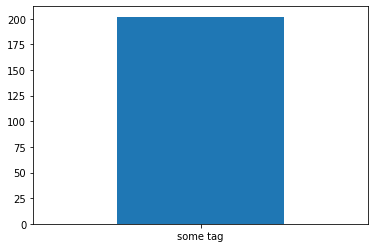

In [13]:
df = get_files_df()
my_tags = df.tag.unique()
df.tag.value_counts().plot(kind="bar", rot=0)

In [14]:
import gensim.downloader
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [15]:
def get_tagged_data():
    twoDList = get_metrix_for_df()
    tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(twoDList)]
    return tagged_data

In [ ]:
tagged_data = get_tagged_data()
#tagged_data

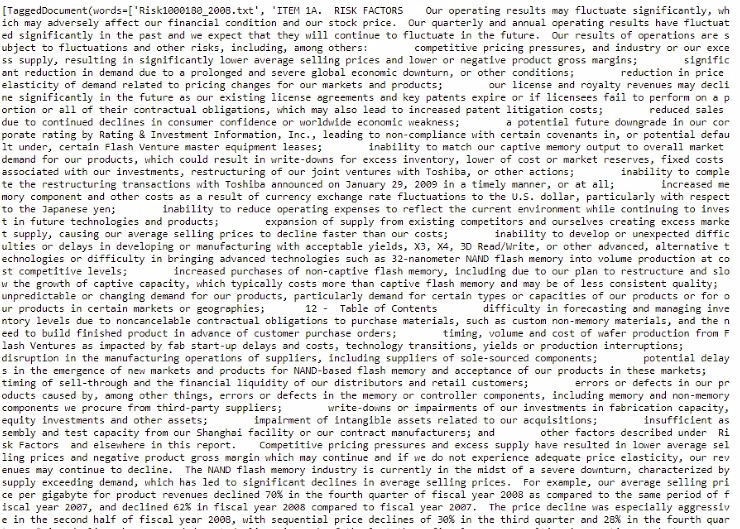

similarity check of one files to all the other files

In [18]:
def get_model():
    ## Train doc2vec model
    model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)
    print(model)
    words = list(model.wv.index_to_key)
    print(words)
    return model

In [ ]:
#model = get_model()

In [20]:
treatment_doc = word_tokenize(all_files_buffers[0].lower())
treatment_doc_vector = model.infer_vector(treatment_doc)
model.docvecs.most_similar(positive = [treatment_doc_vector])

<ipython-input-20-8101b8860e45>:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive = [test_doc_vector])


[(30, 0.25521647930145264),
 (198, 0.25006189942359924),
 (52, 0.24565774202346802),
 (54, 0.2406974881887436),
 (74, 0.23793262243270874),
 (157, 0.23126335442066193),
 (26, 0.2262895107269287),
 (180, 0.22264786064624786),
 (136, 0.22157332301139832),
 (119, 0.21870842576026917)]

In [21]:
# vector for file number 0

In [22]:
print(model[0])

[ 0.95239675 -0.01266999  0.365889    0.24066436 -0.08320056  0.19270079
 -0.19328238  0.4261792  -1.043566    0.5002305   0.08593453  0.55472136
  0.11734011  0.54493946  0.09315443  0.45462316  0.71471745 -0.68559235
 -0.16597848 -0.5220093 ]


---

# 10) Spaces remover

The following plan is perhaps the simplest of all this notebook but in our opinion is also important. The notebook simply cleared for us the most basic data from the data text files and helped us get slightly more readable files.

In [6]:
import os

In [7]:
t_r = os.listdir('treat_results')
c_r = os.listdir('control_results')

In [8]:
def clean(content):
    new_content = ''
    for c in content:
        if c!= ' ':
            new_content += c
    return new_content

In [9]:
for name in t_r:
    with open('treat_results\\' + name, 'r', encoding = 'utf-8') as f1:
        content = f1.read()
    content = clean(content)
    with open('treat_results\\' + name, 'w', encoding = 'utf-8') as f2:
        f2.write(content)

In [10]:
for name in c_r:
    with open('control_results\\' + name, 'r', encoding = 'utf-8') as f1:
        content = f1.read()
    content = clean(content)
    with open('control_results\\' + name, 'w', encoding = 'utf-8') as f2:
        f2.write(content)